In this Python program, the goal is to generate a Bayesian network and solve it using PyAgrum libraries. Afterwards, the instructions are coded using our own method in order to compare the results. The results from both methods should be the same since both are exact methods.

It is acknowledged that there are several possible sources of error:

Error in the mathematical formulation, which has been addressed by reviewing the mathematical proofs.

Error during coding, which can be fixed through extensive debugging.

Rounding errors.

This document is composed of several parts:

PART ONE: CREATION OF BAYESIAN NETWORK AND CALCULATION OF PROBABILITY VALUES USING STANDARD METHOD

PART TWO: CREATION OF BAYESIAN NETWORK WITH MERGED NODES

PART THREE: FOR VISUALIZATION ONLY

PART FOUR: SOLVING THE BAYESIAN NETWORK WITH MERGED NODES

PART FIVE SUBROUTINES FOR FINAL CALCULATION (NEW METHOD)

PART SIX CALCULATION (NEW METHOD)

PART SEVEN COMPARISON BETWEEN THE TWO METHODS


PART ONE: CREATION OF BAYESIAN NETWORK AND CALCULATION OF PROBABILITY VALUES USING STANDARD METHOD

In [1]:
# Delete the variable named 'list' to restore the built-in function
if 'list' in globals():
    del list

Library Installation: PyAgrum
To work with Bayesian Networks in Python, we use the PyAgrum library.

In [2]:
!pip  install pyagrum       # instalacion de libreria
import pyagrum as gum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 27.9 MB/s eta 0:00:00


In [3]:
import pyagrum.lib.notebook as gnb

In [4]:
import numpy as np          # importar  librerias  numericas de python
import matplotlib.pyplot as plt

In [5]:
import pandas as pd


Construction of the Bayesian Network
This network is composed of a series of rules known as R0, R1, ..., Rn, where each rule is a vector consisting of 4 elements:

The first element indicates the name of the variable.

The second element indicates the variables that compose it, in case it is a node with merged variables.

The third element indicates the parent nodes.

The last element indicates the probabilities:

If the node has no parents, this element contains the marginal probabilities.

If the node has parents, this element contains the conditional probabilities.

To obtain the number of conditional probabilities in the last element, it is calculated as 2^(𝑛+𝑚), where:n is the number of parent variables of the node (here it would be 𝑛1+𝑛2+…, since these parent nodes could also be merged nodes), and m is the number of merged elements composing the node.

In [6]:
# construccion de la red
R0=['FM',[],[],[0.6,0.4]]
R1=['PM',[],[],[0.3,0.7]]
R2=['MTI',[],[],[0.4,0.6]]
R3=['UM',[],[],[0.75,0.25]]
R4=['F',[],['FM','MTI'],[1.0,0.0,0.6,0.40,0.6,0.4,0.15,0.85]]
R5=['B',[],['MTI'],[1,0,0.1,0.9]]
#b=0.6           # 0.03333 <b < 0.7
#d=(0.42-0.6*b)/0.4
#a=0.2           # a < 0.2583
#c=(0.3160-0.24*a-0.36*b-0.24*d)/0.16
a=0.056
b=0.316
c=0.316
d=0.576
R6=['VIH',[],['FM','MTI'],[1-a,a,1-b,b,1-c,c,1-d,d]]
#c=0.5     #0.31< c <0.64333
#d=(0.4825-0.75*c)/0.25
#a=0.1
#b=(0.3195-0.45*c-0.15*d-0.3*a)/0.1
a=0.0070
b=0.2787
c=0.3330
d=0.9307
R7=['SU',[],['MTI','UM'],[1-a,a,1-b,b,1-c,c,1-d,d]]
b=0.8552          # 0.4514 <b < 0.88
a=(0.6160-0.7*b)/0.3
R8=['MM',[],['PM'],[1-a,a,1-b,b]]
a=0.0101
b=0.2357
c=0.2357
d=0.4614
e=0.2357
f=0.4614
g=0.4614
h=0.6870
R9=['MP',[],['F','B','VIH'],[1-a,a,1-b,b,1-c,c,1-d,d,1-e,e,1-f,f,1-g,g,1-h,h]]
# 0.22248a+0.18952b+0.31752c+0.27048d=0.5899
# 0.042a+0.378b+0.058c+0.522d=0.7077
a=0.3775
b=0.6006
c=0.6006
d=0.8237
R10=['MD',[],['F','B'],[1-a,a,1-b,b,1-c,c,1-d,d]]
R11=['FC',[],['F'],[1,0,0.15,0.85]]
a=0.3022
b=0.5264
c=0.5264
d=0.7505
e=0.5264
f=0.7505
g=0.7505
h=0.9747
R12=['ANC',[],['MM','MP','SU'],[1-a,a,1-b,b,1-c,c,1-d,d,1-e,e,1-f,f,1-g,g,1-h,h]]
a=0.1122
b=0.6791
c=0.6791
d=0.9626
e=0.6791
f=0.9626
g=0.9626
h=0.9626
R13=['CR',[],['MM','MD','SU'],[1-a,a,1-b,b,1-c,c,1-d,d,1-e,e,1-f,f,1-g,g,1-h,h]]
R14=['CC',[],['VIH'],[1,0,0.05,0.95]]
Red=[R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14]

In this part, the network is translated into a format that PyAgrum can understand.

In [7]:
bn=gum.BayesNet()      # aqui se construye la red bayesiana , definiendo las las variables , se genera un diccionario para tener localizadas las variables
var={}
j=0
for i in Red:
  bn.add(i[0], 2)
  var[i[0]]=j
  j=j+1
print(var)

{'FM': 0, 'PM': 1, 'MTI': 2, 'UM': 3, 'F': 4, 'B': 5, 'VIH': 6, 'SU': 7, 'MM': 8, 'MP': 9, 'MD': 10, 'FC': 11, 'ANC': 12, 'CR': 13, 'CC': 14}


In [8]:
for i in Red:                  # definicion d elos arcos entre las variables, aqui se ve porque tuve que hacer el diccionario
  ind=len(i[2])
  if ind>0:
    for j in range(0,ind):
      var1=var[i[0]]
      var2=var[i[2][j]]
      bn.addArc(var2,var1)

In [9]:
for i in Red:                     # poner las probabilidades condicionales en la red bayesiana
  ind=len(i[2])
  if ind==0:
    t=[i[3][0],i[3][1]]
    t1=var[i[0]]
    bn.cpt(t1).fillWith(t)


  elif ind==1:
    t1=var[i[0]]
    bn.cpt(t1)[{i[2][0]:0}]=[i[3][0],i[3][1]]
    bn.cpt(t1)[{i[2][0]:1}]=[i[3][2],i[3][3]]


  elif ind==2:
    t1=var[i[0]]
    bn.cpt(t1)[{i[2][0]:0,i[2][1]:0}]=[i[3][0],i[3][1]]
    bn.cpt(t1)[{i[2][0]:0,i[2][1]:1}]=[i[3][2],i[3][3]]
    bn.cpt(t1)[{i[2][0]:1,i[2][1]:0}]=[i[3][4],i[3][5]]
    bn.cpt(t1)[{i[2][0]:1,i[2][1]:1}]=[i[3][6],i[3][7]]


  elif ind==3:
    t1=var[i[0]]
    bn.cpt(t1)[{i[2][0]:0,i[2][1]:0,i[2][2]:0}]=[i[3][0],i[3][1]]
    bn.cpt(t1)[{i[2][0]:0,i[2][1]:0,i[2][2]:1}]=[i[3][2],i[3][3]]
    bn.cpt(t1)[{i[2][0]:0,i[2][1]:1,i[2][2]:0}]=[i[3][4],i[3][5]]
    bn.cpt(t1)[{i[2][0]:0,i[2][1]:1,i[2][2]:1}]=[i[3][6],i[3][7]]
    bn.cpt(t1)[{i[2][0]:1,i[2][1]:0,i[2][2]:0}]=[i[3][8],i[3][9]]
    bn.cpt(t1)[{i[2][0]:1,i[2][1]:0,i[2][2]:1}]=[i[3][10],i[3][11]]
    bn.cpt(t1)[{i[2][0]:1,i[2][1]:1,i[2][2]:0}]=[i[3][12],i[3][13]]
    bn.cpt(t1)[{i[2][0]:1,i[2][1]:1,i[2][2]:1}]=[i[3][14],i[3][15]]


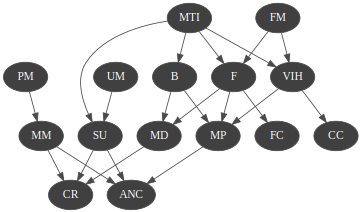

In [10]:
gnb.showBN(bn)

LazyPropagation in PyAgrum is an exact inference algorithm based on the Junction Tree algorithm. It computes exact marginal probabilities by propagating beliefs in a junction tree but optimizes computations by delaying some multiplications

In [11]:
ie=gum.LazyPropagation(bn)
ie

target(s) allEvidence and targets


These are probability data taken from the reference:Ben Brahim, A. E. M. Y. B., S.A. Addouche (2019). “Build a Bayesian Network
from FMECA in the production of Automotive Parts: Diagnosis and Prediction.”
FAC PapersOnLine, 52-13: 2572–2577

In [12]:
dict={}
dict['MP']=[0.4,0.7,0.6,0.25,0.4120,0.54,0.3160,0.3195,0.6160,0.2962,0.5899,0.3502,0.5783,0.7648,0.3002]
dict['MTI']=[0.4,0.7,1.00,0.25,0.58,0.90,0.42,0.4825,0.6160,0.4388,0.7077,0.4930,0.6468,0.8316,0.3990]
dict['CR']=[0.4146,0.7892,0.6525,0.2634,0.4639,0.5917,0.3371,0.3768,0.7302,0.3246,0.6951,0.3943,0.6683,1.00,0.3203]
df=pd.DataFrame(dict,index=['FM','PM','MTI','UM','F','B','VIH','SU','MM','MP','MD','FC','ANC','CR','CC'])


Marginal probabilities of the Bayesian network calculated by the PyAgrum routines.

In [13]:
nn=[]
for r in Red:
  var=r[0]
  print(ie.posterior(var))
  pp=ie.posterior(var)
  nn.append(round(pp[1],4))
df['MP BN']=nn
df_nuevo=df[['MP BN']]


  FM               |
0        |1        |
---------|---------|
 0.6000  | 0.4000  |


  PM               |
0        |1        |
---------|---------|
 0.3000  | 0.7000  |


  MTI              |
0        |1        |
---------|---------|
 0.4000  | 0.6000  |


  UM               |
0        |1        |
---------|---------|
 0.7500  | 0.2500  |


  F                |
0        |1        |
---------|---------|
 0.5880  | 0.4120  |


  B                |
0        |1        |
---------|---------|
 0.4600  | 0.5400  |


  VIH              |
0        |1        |
---------|---------|
 0.6840  | 0.3160  |


  SU               |
0        |1        |
---------|---------|
 0.6806  | 0.3194  |


  MM               |
0        |1        |
---------|---------|
 0.3840  | 0.6160  |


  MP               |
0        |1        |
---------|---------|
 0.7038  | 0.2962  |


  MD               |
0        |1        |
---------|---------|
 0.4101  | 0.5899  |


  FC               |
0        |1        |
---------|-

In [14]:
df

,MP,MTI,CR,MP BN
FM,0.4000,0.4000,0.4146,0.4000
PM,0.7000,0.7000,0.7892,0.7000
MTI,0.6000,1.0000,0.6525,0.6000
UM,0.2500,0.2500,0.2634,0.2500
F,0.4120,0.5800,0.4639,0.4120
B,0.5400,0.9000,0.5917,0.5400
VIH,0.3160,0.4200,0.3371,0.3160
SU,0.3195,0.4825,0.3768,0.3194
MM,0.6160,0.6160,0.7302,0.6160
MP,0.2962,0.4388,0.3246,0.2962


Probabilities of the Bayesian network calculated by the PyAgrum routines when the variable MTI = 1 (Mould Temperature Inadequate).

In [15]:
ie.setEvidence({'MTI':1})
ie.makeInference()
nn=[]
for r in Red:
  var=r[0]
  print(ie.posterior(var))
  pp=ie.posterior(var)
  nn.append(round(pp[1],4))
df['MIT BN']=nn
df_nuevo['MIT BN']=nn


  FM               |
0        |1        |
---------|---------|
 0.6000  | 0.4000  |


  PM               |
0        |1        |
---------|---------|
 0.3000  | 0.7000  |


  MTI              |
0        |1        |
---------|---------|
 0.0000  | 1.0000  |


  UM               |
0        |1        |
---------|---------|
 0.7500  | 0.2500  |


  F                |
0        |1        |
---------|---------|
 0.4200  | 0.5800  |


  B                |
0        |1        |
---------|---------|
 0.1000  | 0.9000  |


  VIH              |
0        |1        |
---------|---------|
 0.5800  | 0.4200  |


  SU               |
0        |1        |
---------|---------|
 0.5176  | 0.4824  |


  MM               |
0        |1        |
---------|---------|
 0.3840  | 0.6160  |


  MP               |
0        |1        |
---------|---------|
 0.5612  | 0.4388  |


  MD               |
0        |1        |
---------|---------|
 0.2923  | 0.7077  |


  FC               |
0        |1        |
---------|-

/tmp/ipython-input-1557241224.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['MIT BN']=nn


Probabilities of the Bayesian network calculated by the PyAgrum routines when the variable CR = 1 (Customer Refusal).

In [16]:
ie.setEvidence({'CR':1})
ie.makeInference()
nn=[]
for r in Red:
  var=r[0]
  print(ie.posterior(var))
  pp=ie.posterior(var)
  nn.append(round(pp[1],4))
df['CR BN']=nn
df_nuevo['CR BN']=nn


  FM               |
0        |1        |
---------|---------|
 0.5909  | 0.4091  |


  PM               |
0        |1        |
---------|---------|
 0.2316  | 0.7684  |


  MTI              |
0        |1        |
---------|---------|
 0.3406  | 0.6594  |


  UM               |
0        |1        |
---------|---------|
 0.7255  | 0.2745  |


  F                |
0        |1        |
---------|---------|
 0.5461  | 0.4539  |


  B                |
0        |1        |
---------|---------|
 0.4024  | 0.5976  |


  VIH              |
0        |1        |
---------|---------|
 0.6662  | 0.3338  |


  SU               |
0        |1        |
---------|---------|
 0.6083  | 0.3917  |


  MM               |
0        |1        |
---------|---------|
 0.2873  | 0.7127  |


  MP               |
0        |1        |
---------|---------|
 0.6773  | 0.3227  |


  MD               |
0        |1        |
---------|---------|
 0.3031  | 0.6969  |


  FC               |
0        |1        |
---------|-

/tmp/ipython-input-733160996.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['CR BN']=nn


In [17]:
df

,MP,MTI,CR,MP BN,MIT BN,CR BN
FM,0.4000,0.4000,0.4146,0.4000,0.4000,0.4091
PM,0.7000,0.7000,0.7892,0.7000,0.7000,0.7684
MTI,0.6000,1.0000,0.6525,0.6000,1.0000,0.6594
UM,0.2500,0.2500,0.2634,0.2500,0.2500,0.2745
F,0.4120,0.5800,0.4639,0.4120,0.5800,0.4539
B,0.5400,0.9000,0.5917,0.5400,0.9000,0.5976
VIH,0.3160,0.4200,0.3371,0.3160,0.4200,0.3338
SU,0.3195,0.4825,0.3768,0.3194,0.4824,0.3917
MM,0.6160,0.6160,0.7302,0.6160,0.6160,0.7127
MP,0.2962,0.4388,0.3246,0.2962,0.4388,0.3227


In [18]:
df.columns

Index(['MP', 'MTI', 'CR', 'MP BN', 'MIT BN', 'CR BN'], dtype='object')

In [19]:
new_order = ['MP', 'MP BN','MTI', 'MIT BN', 'CR',
       'CR BN']
df = df[new_order]

In [20]:
df

,MP,MP BN,MTI,MIT BN,CR,CR BN
FM,0.4000,0.4000,0.4000,0.4000,0.4146,0.4091
PM,0.7000,0.7000,0.7000,0.7000,0.7892,0.7684
MTI,0.6000,0.6000,1.0000,1.0000,0.6525,0.6594
UM,0.2500,0.2500,0.2500,0.2500,0.2634,0.2745
F,0.4120,0.4120,0.5800,0.5800,0.4639,0.4539
B,0.5400,0.5400,0.9000,0.9000,0.5917,0.5976
VIH,0.3160,0.3160,0.4200,0.4200,0.3371,0.3338
SU,0.3195,0.3194,0.4825,0.4824,0.3768,0.3917
MM,0.6160,0.6160,0.6160,0.6160,0.7302,0.7127
MP,0.2962,0.2962,0.4388,0.4388,0.3246,0.3227


Probabilities of the Bayesian network calculated by the PyAgrum routines when the variable CR = 1 (Customer Refusal) and MTI=1 (mould Temperature Inadequate)

In [21]:
ie.setEvidence({'MTI':1,'CR':1})
ie.makeInference()
nn=[]
for r in Red:
  var=r[0]
  print(ie.posterior(var))
  ppss=ie.posterior(var)
  nn.append(round(ppss[1],4))
df['MTI CR BN']=nn
df_nuevo['MTI CR BN']=nn


  FM               |
0        |1        |
---------|---------|
 0.5926  | 0.4074  |


  PM               |
0        |1        |
---------|---------|
 0.2538  | 0.7462  |


  MTI              |
0        |1        |
---------|---------|
 0.0000  | 1.0000  |


  UM               |
0        |1        |
---------|---------|
 0.7242  | 0.2758  |


  F                |
0        |1        |
---------|---------|
 0.4033  | 0.5967  |


  B                |
0        |1        |
---------|---------|
 0.0938  | 0.9062  |


  VIH              |
0        |1        |
---------|---------|
 0.5781  | 0.4219  |


  SU               |
0        |1        |
---------|---------|
 0.4600  | 0.5400  |


  MM               |
0        |1        |
---------|---------|
 0.3187  | 0.6813  |


  MP               |
0        |1        |
---------|---------|
 0.5556  | 0.4444  |


  MD               |
0        |1        |
---------|---------|
 0.2287  | 0.7713  |


  FC               |
0        |1        |
---------|-

/tmp/ipython-input-2932324785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MTI CR BN']=nn
/tmp/ipython-input-2932324785.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['MTI CR BN']=nn


Probabilities of the Bayesian network calculated by the PyAgrum routines when the variable CR = 1 (Customer Refusal) , MTI=1 (mould Temperature Inadequate) and PM=1 (placing Material)

In [22]:
ie.setEvidence({'MTI':1,'CR':1,'PM':0})
ie.makeInference()
nn=[]
for r in Red:
  var=r[0]
  print(ie.posterior(var))
  ppss=ie.posterior(var)
  nn.append(round(ppss[1],4))
df['MTI CR PM BN']=nn
df_nuevo['MTI CR PM BN']=nn


  FM               |
0        |1        |
---------|---------|
 0.5858  | 0.4142  |


  PM               |
0        |1        |
---------|---------|
 1.0000  | 0.0000  |


  MTI              |
0        |1        |
---------|---------|
 0.0000  | 1.0000  |


  UM               |
0        |1        |
---------|---------|
 0.6942  | 0.3058  |


  F                |
0        |1        |
---------|---------|
 0.3880  | 0.6120  |


  B                |
0        |1        |
---------|---------|
 0.0882  | 0.9118  |


  VIH              |
0        |1        |
---------|---------|
 0.5763  | 0.4237  |


  SU               |
0        |1        |
---------|---------|
 0.3934  | 0.6066  |


  MM               |
0        |1        |
---------|---------|
 0.9243  | 0.0757  |


  MP               |
0        |1        |
---------|---------|
 0.5505  | 0.4495  |


  MD               |
0        |1        |
---------|---------|
 0.1706  | 0.8294  |


  FC               |
0        |1        |
---------|-

/tmp/ipython-input-1378903207.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MTI CR PM BN']=nn
/tmp/ipython-input-1378903207.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['MTI CR PM BN']=nn


In [23]:
print(bn)

BN{nodes: 15, arcs: 21, domainSize: 32768, dim: 52, mem: 832o}


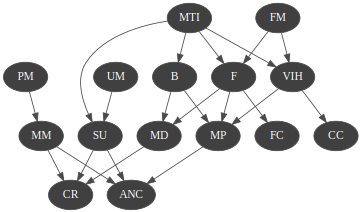

In [24]:
gnb.showBN(bn)

In the problem presented in the article, probabilities were assigned to the nodes to better approximate the results shown in the article. Unfortunately, the article does not provide enough data to deduce the exact values of the conditional probabilities in the nodes. Nonetheless, the best values were sought to closely match these results.

It should be clarified, however, that obtaining the precise values reported in Ibrahim’s article is not the objective of this work, but rather to demonstrate the agreement between our proposed method and the standard approach for solving Bayesian networks.

In [25]:
df_nuevo

,MP BN,MIT BN,CR BN,MTI CR BN,MTI CR PM BN
FM,0.4000,0.4000,0.4091,0.4074,0.4142
PM,0.7000,0.7000,0.7684,0.7462,0.0000
MTI,0.6000,1.0000,0.6594,1.0000,1.0000
UM,0.2500,0.2500,0.2745,0.2758,0.3058
F,0.4120,0.5800,0.4539,0.5967,0.6120
B,0.5400,0.9000,0.5976,0.9062,0.9118
VIH,0.3160,0.4200,0.3338,0.4219,0.4237
SU,0.3194,0.4824,0.3917,0.5400,0.6066
MM,0.6160,0.6160,0.7127,0.6813,0.0757
MP,0.2962,0.4388,0.3227,0.4444,0.4495


PART TWO: CREATION OF BAYESIAN NETWORK WITH MERGED NODES




Nodos: 1er (MTI,FM),UM,PM; 2do. (B,F,VIH,SU),MM, 3er: (MD,MP,SU);4to (CR,ANC),CC,FC

In [26]:
# construccion de la red
R0=['FM',['FM'],[],[0.6,0.4]]
R1=['PM',['PM'],[],[0.3,0.7]]
R2=['MTI',['MTI'],[],[0.4,0.6]]
R3=['UM',['UM'],[],[0.75,0.25]]
R4=['F',['F'],['FM','MTI'],[1.0,0.0,0.6,0.40,0.6,0.4,0.15,0.85]]
R5=['B',['B'],['MTI'],[1,0,0.1,0.9]]
#b=0.6           # 0.03333 <b < 0.7
#d=(0.42-0.6*b)/0.4
#a=0.2           # a < 0.2583
#c=(0.3160-0.24*a-0.36*b-0.24*d)/0.16
a=0.056
b=0.316
c=0.316
d=0.576
R6=['VIH',['VIH'],['FM','MTI'],[1-a,a,1-b,b,1-c,c,1-d,d]]
#c=0.5     #0.31< c <0.64333
#d=(0.4825-0.75*c)/0.25
#a=0.1
#b=(0.3195-0.45*c-0.15*d-0.3*a)/0.1
a=0.0070
b=0.2787
c=0.3330
d=0.9307
R7=['SU',['SU'],['MTI','UM'],[1-a,a,1-b,b,1-c,c,1-d,d]]
R7ad=['SUad',['SUad'],['SU'],[1,0,0,1]]
b=0.8552          # 0.4514 <b < 0.88
a=(0.6160-0.7*b)/0.3
R8=['MM',['MM'],['PM'],[1-a,a,1-b,b]]
a=0.0101
b=0.2357
c=0.2357
d=0.4614
e=0.2357
f=0.4614
g=0.4614
h=0.6870
R9=['MP',['MP'],['F','B','VIH'],[1-a,a,1-b,b,1-c,c,1-d,d,1-e,e,1-f,f,1-g,g,1-h,h]]
# 0.22248a+0.18952b+0.31752c+0.27048d=0.5899
# 0.042a+0.378b+0.058c+0.522d=0.7077
a=0.3775
b=0.6006
c=0.6006
d=0.8237
R10=['MD',['MD'],['F','B'],[1-a,a,1-b,b,1-c,c,1-d,d]]
R11=['FC',['FC'],['F'],[1,0,0.15,0.85]]
a=0.3022
b=0.5264
c=0.5264
d=0.7505
e=0.5264
f=0.7505
g=0.7505
h=0.9747
R12=['ANC',['ANC'],['MM','MP','SUad'],[1-a,a,1-b,b,1-c,c,1-d,d,1-e,e,1-f,f,1-g,g,1-h,h]]
a=0.1122
b=0.6791
c=0.6791
d=0.9626
e=0.6791
f=0.9626
g=0.9626
h=0.9626
R13=['CR',['CR'],['MM','MD','SUad'],[1-a,a,1-b,b,1-c,c,1-d,d,1-e,e,1-f,f,1-g,g,1-h,h]]
R14=['CC',['CC'],['VIH'],[1,0,0.05,0.95]]
Red=[R0,R1,R2,R3,R4,R5,R6,R7,R7ad,R8,R9,R10,R11,R12,R13,R14]

Load the itertools library, as it is required in the subroutines.

In [27]:
import itertools
import pdb
#combinaciones = list(itertools.product([0, 1], repeat=2))
#combinaciones

The following routine is in alpha phase and is used to generate merged nodes.

In [28]:
def fusion(RN,RG,Redc):       # subrutina que fusiona dos nodos
# RN es el nombre de la nueva variable fusionada
# RG es el grupo de nuevas reglas quese van adicionar
  RGN=[]
  for R in RG:
    RGN.append(R[0])


  RPN=[]
  DPND={}
  DPos={}

  for R in RG:
    #DPND[R[0]]=R[2]
    for elem in R[2]:
      if elem not in RPN:
        RPN.append(elem)
    i=0
    for r in Redc:
      if (r[0]==R[0]):
        DPos[R[0]]=i
      i=i+1

  for R in RG:
    DPND[R[0]]=[]
    for R1 in R[2]:
      for r in Redc:
        if (R1==r[0]):
          nl=len(r[1])
          DPND[R[0]].extend(r[1])





  m=len(RGN)
  RPND={}
  n=0
  for elem in RPN:
    for R in Redc:
      if (elem==R[0]):
        RPND[elem]=R[1]
        n=n+len(R[1])


  comb=list(itertools.product([0, 1], repeat=n+m))
  prob=[1]*(2**(n+m))

  lista=list(RPND.keys())

  #####

  RPNDF = copy.deepcopy(RPN)
  for elem in RPN:
    for r in Redc:
      if (elem==r[0]):
        nl=len(r[1])
        indice = RPNDF.index(r[0])
        RPNDF=RPNDF[:indice] +r[1]+ RPNDF[indice+1:]
        break

  #####

  for co in comb:
    # Convierte la tupla binaria a una cadena y luego a decimal
    ind = int("".join(map(str, co)), 2)
    cm=co[-m:]
    pp=1

    for j in range(0,m):
      nom=RGN[j]
      #### aqui hay un error si se usan nodos fusionados RPN deberia tomar mas indices y solo toma uno, si viene un indice de un nodo despues de uno o mas fusionados
      #### tambien habria error
      valores = [co[RPNDF.index(x)] for x in DPND[nom]]
      ####
      valores.append(cm[j])
      ind1 = int("".join(map(str, valores)), 2)
      pos=DPos[nom]
      ppr=Redc[pos][3][ind1]
      pp=pp*ppr
    #valores = [com[RPN.index(x)] for x in RPND[][1]]
    #for r  in RGN:

    prob[ind]=pp



  ###########



##### esto por modificar, pero como

  # Generacion de nueva regla
  RNN=[RN,RGN,RPN,prob]

  # modificacion de la red

  ultimo_indice = max(Redc.index(x) for x in RG)

  Redc.insert(ultimo_indice + 1, RNN)
  for elem in RG:
    Redc.remove(elem)
  indice=ultimo_indice+1-len(RG)


  ###  modificacion mas d ela red
  for i, R in enumerate(Redc):
    if i != indice:
      existe = any(elem in R[2] for elem in RGN)
      if existe:
        R1 = [elem for elem in R[2] if elem not in RGN]
        RS1=copy.deepcopy(R1)
        RS1.append(RGN)
        RS1.append(R[1])
        R2=copy.deepcopy(R[2])
        R2.append((R[1]))
        RS1 = [elem for sublista in RS1 for elem in (sublista if isinstance(sublista, list) else [sublista])]
        R2 = [elem for sublista in R2 for elem in (sublista if isinstance(sublista, list) else [sublista])]

        R1.append(RN)
        R[2]=R1
        nn=len(RS1)
        comb=list(itertools.product([0, 1], repeat=nn))
        nt=2**nn
        RP=[0] * nt

        for co in comb:
          # Convierte la tupla binaria a una cadena y luego a decimal
          ind = int("".join(map(str, co)), 2)
          valores = [co[RS1.index(x)] for x in R2]
          ind1 = int("".join(map(str, valores)), 2)
          RP[ind]=R[3][ind1]

        R[3]=RP

  #####


  return RNN,Redc

In [29]:
import copy
Redm = copy.deepcopy(Red)


The following instructions show how merged nodes are generated. It is important to note that not only are nodes with internally merged nodes created, but it is also necessary to generate the list of conditional probabilities for the merged node (this is done by the previously shown fusion subroutine).

In [30]:
R02,Red1=fusion('FM-MTI',[R0,R2],Redm)


In [31]:
R02


['FM-MTI', ['FM', 'MTI'], [], [0.24, 0.36, 0.16000000000000003, 0.24]]

In [32]:
Red1m = copy.deepcopy(Red1)

In [33]:
R03,Red2=fusion('B-F-VIH-SU', [Red1[4],Red1[3],Red1[5],Red1[6]],Red1m)


In [34]:
print(R03[0])
print(R03[1])
print(R03[2])

B-F-VIH-SU
['B', 'F', 'VIH', 'SU']
['FM-MTI', 'UM']


In [35]:
Red2m = copy.deepcopy(Red2)

In [36]:
R04,Red3=fusion('MD-MP-SUad', [Red2[7],Red2[6],Red2[4]],Red2m)


In [37]:
print(R04[0])
print(R04[1])
print(R04[2])

MD-MP-SUad
['MD', 'MP', 'SUad']
['B-F-VIH-SU']


In [38]:
Red3m = copy.deepcopy(Red3)

In [39]:
R05,Red4=fusion('CR-ANC', [Red3[8],Red3[7]],Red3m)


In [40]:
print(R05[0])
print(R05[1])
print(R05[2])

CR-ANC
['CR', 'ANC']
['MM', 'MD-MP-SUad']


In [41]:
ind=8
Red4[ind][0],Red4[ind][1],Red4[ind][2]

('CC', ['CC'], ['B-F-VIH-SU'])

PART THREE: FOR VISUALIZATION ONLY

No subroutines were created to visualize the Bayesian network; in this case, other PyAgrum subroutines are used to generate the Bayesian network and display how it looks.

In [42]:
bnf=gum.BayesNet()      # aqui se construye la red bayesiana , definiendo las las variables , se genera un diccionario para tener localizadas las variables
bnf.add('MTI, FM', 4)
bnf.add('UM', 2)
bnf.add('PM', 2)
bnf.add('B, F, VIH, SU', 16)
bnf.add('MM', 2)
bnf.add('MD, MP, SUad', 8)
bnf.add('CR, ANC', 4)
bnf.add('CC',2)
bnf.add('FC', 2)


8

In [43]:
bnf.addArc('MTI, FM','B, F, VIH, SU')
bnf.addArc('UM','B, F, VIH, SU')
bnf.addArc('PM','MM')
bnf.addArc('B, F, VIH, SU','MD, MP, SUad')
bnf.addArc('B, F, VIH, SU','CC')
bnf.addArc('B, F, VIH, SU','FC')
bnf.addArc('MM','CR, ANC')
bnf.addArc('MD, MP, SUad','CR, ANC')



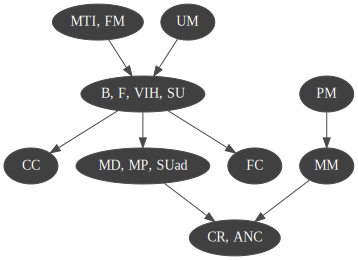

In [44]:
gnb.showBN(bnf)

PART FOUR: SOLVING THE BAYESIAN NETWORK WITH MERGED NODES USING THE NEW METHOD

CALCULATION OF MERGED PROBABILITIES

In this section, the subroutines developed using the new evidence propagation method are presented. These subroutines are used to calculate the probabilities of the nodes that are part of the Bayesian network.

Subroutine to generate an encoded list of binary numbers

In [45]:
# generacion de codificacion
def codigo(nn):
  m=2**nn
  mm=list(range(m))
  mb = [bin(num)[2:].zfill(nn) for num in mm]
  return mb


Calculation of Marginal Probabilities in the bayesian network

In [46]:
# calculo de probabilidades marginales
def probabilidad_marginal(Red):
  pm={}  #para almacenar los valores de probabilidades marginales

  for Rn in Red:
    # asignacion de elementos padres en la regla
    np=len(Rn[2])
    val=Rn[0]
    if (np==0):
      pm[val]=Rn[3]
      continue


    # asignacion de probablidades marginales que conforman la regla
    nelem=len(Rn[1])
    mb =codigo(nelem)

    # asignacion de la posicion de los padres del nodo en la red
    indP=[]
    for i, r in enumerate(Rn[2]):
      for j,R in enumerate(Red):
        if (r==R[0]):
          indP.append(j)
          break
      #print(i)
      #print(r)
      #print(indP[i])
      #print(Red[indP[i]][0])


    pad={}
    nsp=0
    for i, r in enumerate(Rn[2]):
      nelemp=len(Red[indP[i]][1])
      nsp=nsp+nelemp
      pad[r]=nsp
      #print(r)
      #print(Red[indP[i]][1])
      #print(nelemp)
      #print(nsp)


    mpp=codigo(nsp)
 # calculo de probabilidades
    PP=[]
    for am in  mb:
      sum=0
      for amp in mpp:

        ampr=amp+am
        dampr = int(ampr, 2)
        pos=[]
        npos=0
        pp=1

        for i,r in enumerate(Rn[2]):
          nsp=pad[r]
          dam=int(ampr[npos:nsp],2)
          npos=nsp
          pp=pp*pm[r][dam]

        sum=sum+pp*Rn[3][dampr]

      PP.append(sum)

    pm[val]=PP


  return pm


In [47]:
Red5=[Red4[0],Red4[1],Red4[2],Red4[3],Red4[4],Red4[5],Red4[6],Red4[7],Red4[8]]

In [48]:
pmm=probabilidad_marginal(Red5)

In [49]:
for p in pmm:
  print(p)


PM
FM-MTI
UM
B-F-VIH-SU
MM
MD-MP-SUad
FC
CR-ANC
CC


In [50]:
def variable_probability(VAR, var):
    """
    Calcula la probabilidad de que la variable 'var' (por nombre o índice)
    tome el valor 1.

    VAR: lista de dos elementos.
         VAR[0] es la lista de nombres de variables.
         VAR[1] es la lista de probabilidades para cada combinación de valores.
         Se asume que hay 2^n combinaciones para n variables.
    var: puede ser el nombre de la variable (str) o su índice (int).
    """
    variables = VAR[0]
    probs = VAR[1]
    n = len(variables)

    # Determinamos el índice de la variable si se pasó como nombre
    if isinstance(var, str):
        try:
            i = variables.index(var)
        except ValueError:
            raise ValueError(f"La variable {var} no se encuentra en la lista de variables.")
    elif isinstance(var, int):
        if 0 <= var < n:
            i = var
        else:
            raise ValueError(f"El índice debe estar entre 0 y {n-1}")
    else:
        raise ValueError("El parámetro 'var' debe ser un nombre (str) o un índice (int).")

    prob_sum = 0
    # Recorremos cada combinación representada por su índice j
    for j, p in enumerate(probs):
        # Convertimos j en binario y revisamos la posición correspondiente a la variable.
        # La variable en posición i corresponde al bit en la posición (n - 1 - i) de j.
        if j & (1 << (n - 1 - i)):
            prob_sum += p
    return prob_sum


In [51]:
dir={}
VAR=[['PM'],pmm['PM']]
dir['PM']=variable_probability(VAR,'PM')
VAR=[['FM','MTI'],pmm['FM-MTI']]
dir['FM']=variable_probability(VAR,'FM')
dir['MTI']=variable_probability(VAR,'MTI')
VAR=[['UM'],pmm['UM']]
dir['UM']=variable_probability(VAR,'UM')
VAR=[['B','F','VIH','SU'],pmm['B-F-VIH-SU']]
dir['B']=variable_probability(VAR,'B')
dir['F']=variable_probability(VAR,'F')
dir['VIH']=variable_probability(VAR,'VIH')
dir['SU']=variable_probability(VAR,'SU')
VAR=[['MM'],pmm['MM']]
dir['MM']=variable_probability(VAR,'MM')
VAR=[['MD','MP','SUad'],pmm['MD-MP-SUad']]
dir['MD']=variable_probability(VAR,'MD')
dir['MP']=variable_probability(VAR,'MP')
VAR=[['FC'],pmm['FC']]
dir['FC']=variable_probability(VAR,'FC')
VAR=[['CR','ANC'],pmm['CR-ANC']]
dir['CR']=variable_probability(VAR,'CR')
dir['ANC']=variable_probability(VAR,'ANC')
VAR=[['CC'],pmm['CC']]
dir['CC']=variable_probability(VAR,'CC')

In [52]:
dir

{'PM': 0.7,
 'FM': 0.4,
 'MTI': 0.6,
 'UM': 0.25,
 'B': 0.54,
 'F': 0.41200000000000003,
 'VIH': 0.316,
 'SU': 0.319425,
 'MM': 0.616,
 'MD': 0.5898912000000001,
 'MP': 0.29620378176,
 'FC': 0.35020000000000007,
 'CR': 0.7565828217192238,
 'ANC': 0.578296254112827,
 'CC': 0.30019999999999997}

In [53]:
df['NM']=dir

/tmp/ipython-input-1939108131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NM']=dir


It is shown that marginal probabilities can be obtained by comparing the NM column with the MP BN column (standard evidence propagation method).

In [54]:
df

,MP,MP BN,MTI,MIT BN,CR,CR BN,MTI CR BN,MTI CR PM BN,NM
FM,0.4000,0.4000,0.4000,0.4000,0.4146,0.4091,0.4074,0.4142,0.400000
PM,0.7000,0.7000,0.7000,0.7000,0.7892,0.7684,0.7462,0.0000,0.700000
MTI,0.6000,0.6000,1.0000,1.0000,0.6525,0.6594,1.0000,1.0000,0.600000
UM,0.2500,0.2500,0.2500,0.2500,0.2634,0.2745,0.2758,0.3058,0.250000
F,0.4120,0.4120,0.5800,0.5800,0.4639,0.4539,0.5967,0.6120,0.412000
B,0.5400,0.5400,0.9000,0.9000,0.5917,0.5976,0.9062,0.9118,0.540000
VIH,0.3160,0.3160,0.4200,0.4200,0.3371,0.3338,0.4219,0.4237,0.316000
SU,0.3195,0.3194,0.4825,0.4824,0.3768,0.3917,0.5400,0.6066,0.319425
MM,0.6160,0.6160,0.6160,0.6160,0.7302,0.7127,0.6813,0.0757,0.616000
MP,0.2962,0.2962,0.4388,0.4388,0.3246,0.3227,0.4444,0.4495,0.296204


In [55]:
import itertools
import numpy as np
import pdb

Subroutine for calculation of evidence propagation in the bayesian network

# **PART FIVE SUBROUTINES FOR FINAL CALCULATION (NEW METHOD)**

**Evidence Propagation Subroutines**

Subroutine to obtain a list of binary numbers for encoding purposes

In [56]:
 # obtener una lista de codigos de numeros binarios
 def codigo(nn):
  mm=2**nn
  mb=[bin(num)[2:].zfill(nn) for num in range(mm)]
  return mb

In [57]:
codigo(3)

['000', '001', '010', '011', '100', '101', '110', '111']

Obtain a list of codes of intermediate binary numbers, where:

nn is the number of data points,

np is the position of the data to consider (position ranges from 0 to nn-1),

val is the value 0 or 1.

In [58]:
# obtener una lista de codigos de numeros intermedios binarios
def codigoInt(nn,np,val):

  # nn es un numero de datos, np es la posicion de dato a considerar (la posicion va de 0 a nn-1), val es el valor 0 o 1
  if (np==0):
    bb=codigo(nn-1)
    lista=[str(val)+b for b in bb]
  elif (np==nn-1):
    bb=codigo(nn-1)
    lista=[b+str(val) for b in bb]
  else:
    bb1=codigo(np)
    bb2=codigo(nn-np-1)
    lista=[]
    for b1 in bb1:
      for b2 in bb2:
        lista.append(b1+str(val)+b2)

  return lista


In [59]:
codigoInt(4,1,1)

['0100', '0101', '0110', '0111', '1100', '1101', '1110', '1111']

Convert from binary list to decimal (important to locate the position in the list of conditional probabilities or probability factors).
Given a binary number, it is converted to decimal indicating the position.

In [60]:
# cambiar de lista binaria a decimal
def codigo_d(bb):
  mb=[int(b,2) for b in bb]
  return mb

In [61]:
bb=codigoInt(4,1,1)
codigo_d(bb)

[4, 5, 6, 7, 12, 13, 14, 15]

Function to display the names of the variables in the Bayesian network

In [62]:
# funcion para mostrar los nombres de las variables
def nomRed(Redc):
  nom=[]
  for r in Redc:
    nom.append(r[0])
  return nom

In [63]:
lista=nomRed(Red5)
lista

['PM', 'FM-MTI', 'UM', 'B-F-VIH-SU', 'MM', 'MD-MP-SUad', 'FC', 'CR-ANC', 'CC']

Calculation of the node probability based on its merged nodes

pp is a list composed of sublists where the first element is the name of the merged node,

nom is the name of the nodes, and val is the value 0 or 1

In [64]:
# calculo de probabilidad d enodo a partir de sus nodos fusionados
def prob(pp,nom,val):
  # pp es una lista compuesta de sublistas donde el primero es el nombre del nodo fusionado, nom es uno el nombre de los nodos y val es el valor  0 o 1

  for i,r in enumerate(pp):
    if (nom in r[1]):
      indr=i
      break

  n=len(pp[indr][1])
  if n==1:
    valp=pp[indr][2][val]
  else:
    suma=0
    np=pp[indr][1].index(nom)
    bb=codigoInt(n,np,val)
    bd=codigo_d(bb)
    for d in bd:
      suma=suma+pp[indr][2][d]
    valp=suma

  return valp


In [65]:
from itertools import product
import math

Determine probability from parent nodes

Redc is the network to be tested,

ind is the index of the variable in the network to calculate,

pp is the list of probabilities

this is FORWARD PROPAGATION EVIDENCE

In [66]:
# determinar probabilidad a partir de nodos padres
def prob_p(Redc, ind, pp):
  # Redc es la red a probar, ind es elnumero de la variable en la red a calcular , pp es la lista de probabilidades
  res=[]
  res.append(Redc[ind][0])
  res.append(Redc[ind][1])
  nn=len(Redc[ind][2])


  if (nn==0):
    res.append(Redc[ind][3])
  else:
    var=nomRed(Redc)
    padres=Redc[ind][2]
    mp=len(padres)
    indi=[var.index(x) for x in padres]
    fus=[Redc[indd][1] for indd in indi]
    mm=len(Redc[ind][1])
    binf=codigo(mm)


    bfath=[]
    bfathp=[]
    for j in range(mp):
      jj=indi[j]
      mp1=len(pp[jj][1])
      bb=codigo(mp1)
      bfath.append(bb)
      bfathp.append(pp[jj][2])


    # Combinaciones de texto
    combinaciones_texto = list(product(*bfath))

    # Combinaciones de números
    combinaciones_numeros = list(product(*bfathp))


    # Ahora combinamos todo:
    bfatht = [''.join(elem) for elem in combinaciones_texto]
    bfatht_numerico = [math.prod(numeros) for numeros in combinaciones_numeros]


    res.append([])

    for i,bb in enumerate(binf):
      # este falta de resolver
      lista=[b+bb for b in bfatht]
      lista_dec=codigo_d(lista)
      numerico=[Redc[ind][3][u] for u in lista_dec]
      resultado = [x * y for x, y in zip(numerico, bfatht_numerico)]
      suma=sum(resultado)
      res[2].append(suma)






  return res


Determine marginal probability. the calculation of marginal probability is composed by forward propagation

In [67]:
# determinar probabilidad marginal
def probabilidad_marginal(Redc):
  pp=[]
  for ind,r in enumerate(Redc):
    res=prob_p(Redc, ind, pp)
    pp.append(res)

  return pp

In [68]:
lista=nomRed(Red5)
lista

['PM', 'FM-MTI', 'UM', 'B-F-VIH-SU', 'MM', 'MD-MP-SUad', 'FC', 'CR-ANC', 'CC']

Calculation of marginal probabilities in the bayesian network

In [69]:
pp=[]
pp=probabilidad_marginal(Red5)
dir={}
for p in pp:
  for pf in p[1]:
    nom=pf
    dir[nom]=round(prob(pp,nom,1),4)
dir

{'PM': 0.7,
 'FM': 0.4,
 'MTI': 0.6,
 'UM': 0.25,
 'B': 0.54,
 'F': 0.412,
 'VIH': 0.316,
 'SU': 0.3194,
 'MM': 0.616,
 'MD': 0.5899,
 'MP': 0.2962,
 'SUad': 0.3194,
 'FC': 0.3502,
 'CR': 0.7566,
 'ANC': 0.5783,
 'CC': 0.3002}

In [70]:
df['NM1']=dir
df

/tmp/ipython-input-267234164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NM1']=dir


,MP,MP BN,MTI,MIT BN,CR,CR BN,MTI CR BN,MTI CR PM BN,NM,NM1
FM,0.4000,0.4000,0.4000,0.4000,0.4146,0.4091,0.4074,0.4142,0.400000,0.4000
PM,0.7000,0.7000,0.7000,0.7000,0.7892,0.7684,0.7462,0.0000,0.700000,0.7000
MTI,0.6000,0.6000,1.0000,1.0000,0.6525,0.6594,1.0000,1.0000,0.600000,0.6000
UM,0.2500,0.2500,0.2500,0.2500,0.2634,0.2745,0.2758,0.3058,0.250000,0.2500
F,0.4120,0.4120,0.5800,0.5800,0.4639,0.4539,0.5967,0.6120,0.412000,0.4120
B,0.5400,0.5400,0.9000,0.9000,0.5917,0.5976,0.9062,0.9118,0.540000,0.5400
VIH,0.3160,0.3160,0.4200,0.4200,0.3371,0.3338,0.4219,0.4237,0.316000,0.3160
SU,0.3195,0.3194,0.4825,0.4824,0.3768,0.3917,0.5400,0.6066,0.319425,0.3194
MM,0.6160,0.6160,0.6160,0.6160,0.7302,0.7127,0.6813,0.0757,0.616000,0.6160
MP,0.2962,0.2962,0.4388,0.4388,0.3246,0.3227,0.4444,0.4495,0.296204,0.2962


In [71]:
df_nuevo['MP NM']=dir
df_nuevo['MP NM']

,MP NM
FM,0.4000
PM,0.7000
MTI,0.6000
UM,0.2500
F,0.4120
B,0.5400
VIH,0.3160
SU,0.3194
MM,0.6160
MP,0.2962


**Internal propagation in nodes**

Redc is the network to be tested,

ind is the index of the variable in the network to calculate,

pp is the list of probabilities,

var would be the variable of the nodes to consider,

val would be the value to take.

In [72]:
# propagacion interna en nodos
def propagacion_interna(Redc,ind,var,val,pp):
  # Redc es la red a probar, ind es elnumero de la variable en la red a calcular , pp es la lista de probabilidades
  # var seria la variable de los nodos a considerar, val seria el valor a tomar

  p=[]
  if (len(Redc[ind][1])==1):
    p=[1-val,val]

  else:
    r=Redc[ind][1]
    np=r.index(var)
    nn=len(r)
    bb=codigoInt(nn,np,val)
    indices=codigo_d(bb)


    nt=len(pp[ind][2])
    pr=nt*[0]


    for i in indices:
      pr[i] = pp[ind][2][i]

    suma = sum(pr)
    pr = [x / suma for x in pr]
    p=pr


  return p

**FORWARD PROPAGATION **

Determine forward evidence propagation

In [73]:
# determinar la propagacion de evidencia hacia adelante
def prob_hacia_adelante(Redc, ind, pp):
  res=prob_p(Redc, ind, pp)

  return res


In [74]:
import copy

**LATERAL PROPAGATION **

Determine Lateral evidence propagation
Redc is the network, ind is the index number of the child, pp is the list of probabilities, var is the evidence propagation variable which must be one of the child's parents.
var is a merged node; define the lateral nodes.

In [75]:
# determinar la propagacion de evidencia lateral
def prob_lateral(Redc, ind, pp, var):
  # Redc es la red , ind es el numero de indice del hijo, pp es lista de probabilidades, var es variable de propagacion de evidencia debe ser uno de los padres del hijo
  # var es un nodo fusionado, definir los laterales
  lista=nomRed(Redc)   # poner la lista de posiciones de la variable
  fusion=Redc[ind][1]  # nodos fusionados
  n=len(fusion)
  bhij=codigo(n)         # lista de codigos binarios
  padres=Redc[ind][2]  # nodos padres
  resp={}
  for r in padres:
    res=[]
    if (r!=var):
      indr=lista.index(r)          # posicion de nodo en la red
      nn=len(Redc[indr][1])
      bbr=codigo(nn)               # lista d ecodigo binario en determinado nodo padre
      ppr=pp[indr][2]              # lista de probabilidades, mismo tamaño que el de codigo

      for i,bbi in enumerate(bbr):
        pb=[]
        pf=[]
        nnt=0
        for rr in padres:
          if (rr==r):
            pb.append(bbi)
            pf.append(ppr[i])
            indv=lista.index(rr)
            nn=len(Redc[indv][1])
            nnt=nnt+nn
          else:
            indv=lista.index(rr)
            nn=len(Redc[indv][1])
            nnt=nnt+nn
            bb=codigo(nn)
            pb.append(bb)
            pf.append(pp[indv][2])


        # Combinaciones de texto
        pb2 = [ [x] if isinstance(x, str) else x for x in pb ]
        combinaciones_texto = [''.join(tupla) for tupla in product(*pb2)]
        # Combinaciones de números
        pf2 = [ [x] if isinstance(x, float) else x for x in pf ]
        combinaciones_prob = list(product(*pf2))
        combinaciones_numeros = [float(np.prod(comb)) for comb in combinaciones_prob]

        # Ahora combinamos todo:
        bfatht = combinaciones_texto
        bfatht_numerico = combinaciones_numeros

        # hasta aqui vamos
        lista1=[]
        for bb in bfatht:
          suma=0

          for bb1 in bhij:
            num1=int(bb+bb1,2)
            suma=suma+Redc[ind][3][num1]
          lista1.append(suma)
        resultado = [a * b for a, b in zip(lista1, bfatht_numerico)]
        suma=sum(resultado)
        res.append(suma)

      resp[r]=res

  return resp

Determine lateral evidence propagation, the coefficients (probability factors).
Redc is the network, ind is the index number of the child, pp is the list of probabilities, ppv is the previous list of probabilities.
Remember that for the propagation parent variable, it will have the same value in both pp and ppv.
You need to specify which variable should not be updated in the coefficient calculation — that one goes in var.

In [76]:
# determinar la propagacion de evidencia lateral, los coeficientes
def prob_lateral_coef(Redc, ind, pp, ppv, var):
  # Redc es la red , ind es el numero de indice del hijo, pp es lista de probabilidades, ppv es la anterior lista de probabilidades
  # recordar que para la variable padre de propagacion tendra el mismo valor enpp y en ppv
  # tienes que especificar cual variable no va en la actualizacion del coeficiente y esa va en var
  lista=nomRed(Redc)   # poner la lista de posiciones de la variable
  padres=Redc[ind][2]  # nodos padres
  pb=[]
  ppa=[]
  ppn=[]
  pf=[]
  for r in padres:
    indv=lista.index(r)
    nn=len(Redc[indv][1])
    bb=codigo(nn)
    pb.append(bb)
    if (r!=var):
      ppa.append(ppv[indv][2])
      ppn.append(pp[indv][2])
    else:
      ppa.append(len(ppv[indv][2])*[1])
      ppn.append(len(pp[indv][2])*[1])



  # Combinaciones de texto
  combinaciones_texto = list(product(*pb))
  bfatht = [''.join(elem) for elem in combinaciones_texto]
  # Combinaciones de números
  combinaciones_numerosv = list(product(*ppa))
  bfatht_numerico_a = [math.prod(numeros) for numeros in combinaciones_numerosv]
  # Combinaciones de números
  combinaciones_numerosn = list(product(*ppn))
  bfatht_numerico_n = [math.prod(numeros) for numeros in combinaciones_numerosn]
  # Ahora combinamos todo:


  nfus=len(Redc[ind][1])
  bb=codigo(nfus)
  coef=copy.deepcopy(Redc[ind][3])
  for bp in bfatht:
    num1=int(bp,2)
    for bh in bb:
      num2=int(bp+bh,2)
      if (bfatht_numerico_n[num1]==0):
        coef[num2]=Redc[ind][3][num2]
      else:
        coef[num2]=Redc[ind][3][num2]*bfatht_numerico_a [num1]/bfatht_numerico_n[num1]


  return coef

Determine backward evidence propagation coefficients (probability factors).
Redc is the network, ind is the index number of the child, pp is the list of probabilities, ppv is the previous list of probabilities.

In [77]:
# determinar la propagacion de evidencia hacia atras coeficientes
def prob_hacia_atras_coef(Redc, ind, pp, ppv):
  # Redc es la red , ind es el numero de indice del hijo, pp es lista de probabilidades, ppv es la anterior lista de probabilidades
  lista=nomRed(Redc)   # poner la lista de posiciones de la variable
  padres=Redc[ind][2]  # nodos padres
  pb=[]
  ppa=[]
  ppn=[]
  pf=[]
  for r in padres:
    indv=lista.index(r)
    nn=len(Redc[indv][1])
    bb=codigo(nn)
    pb.append(bb)
    ppa.append(ppv[indv][2])
    ppn.append(pp[indv][2])


  # Combinaciones de texto
  combinaciones_texto = list(product(*pb))
  bfatht = [''.join(elem) for elem in combinaciones_texto]
  # Combinaciones de números
  combinaciones_numerosv = list(product(*ppa))
  bfatht_numerico_a = [math.prod(numeros) for numeros in combinaciones_numerosv]
  # Combinaciones de números
  combinaciones_numerosn = list(product(*ppn))
  bfatht_numerico_n = [math.prod(numeros) for numeros in combinaciones_numerosn]
  # Ahora combinamos todo:


  nfus=len(Redc[ind][1])
  bb=codigo(nfus)
  coef=copy.deepcopy(Redc[ind][3])
  for bp in bfatht:
    num1=int(bp,2)
    for bh in bb:
      num2=int(bp+bh,2)
      num3=int(bh,2)
      if (bfatht_numerico_n[num1]==0) or (ppv[ind][2][num3]==0):
        coef[num2]=Redc[ind][3][num2]
      else:
        coef[num2]=Redc[ind][3][num2]*bfatht_numerico_a [num1]/bfatht_numerico_n[num1]*pp[ind][2][num3]/ppv[ind][2][num3]


  return coef

Determine **BACKWARD EVIDENCE PROPAGATION**.
Redc is the network, ind is the index number of the child, pp is the list of probabilities, ppv is the previous list of probabilities.

In [78]:
# determinar la propagacion de evidencia hacia atras
def prob_hacia_atras(Redc, ind, ppv,pp):
  # Redc es la red , ind es el numero de indice del hijo, pp es lista de probabilidades, ppv es la anterior lista de probabilidades
  lista=nomRed(Redc)   # poner la lista de posiciones de la variable
  fus=Redc[ind][1]
  nfus=len(fus)
  bbi=codigo(nfus)
  padres=Redc[ind][2]  # nodos padres
  res={}
  for r in padres:
    indvr=lista.index(r)
    fus=Redc[indvr][1]
    nfus=len(fus)
    bb=codigo(nfus)
    pb=[]
    pf=[]
    res[r]=[]
    for b in bb:
      pb=[]
      pf=[]
      numb=int(b,2)
      for rr in padres:
        if (rr==r):
          pb.append(b)
          pf.append([1])
        else:
          indv=lista.index(rr)
          nn=len(Redc[indv][1])
          bb=codigo(nn)
          pb.append(bb)
          pf.append(pp[indv][2])
      # Combinaciones de texto
      pb2 = [ [x] if isinstance(x, str) else x for x in pb ]
      combinaciones_texto = [''.join(tupla) for tupla in product(*pb2)]
      bfatht = combinaciones_texto
      # Combinaciones de números
      pf2 = [ [x] if isinstance(x, float) else x for x in pf ]
      combinaciones_prob = list(product(*pf2))
      combinaciones_numeros = [float(np.prod(comb)) for comb in combinaciones_prob]
      bfatht_numerico=combinaciones_numeros
      # Ahora combinamos todo:


      # me estoy haciendo bolas
      resa=[]
      for bi in bbi:
        num1=int(bi,2)
        prodc=[]
        for jf,bf in enumerate(bfatht):
          num=int(bf+bi,2)
          Redd=copy.deepcopy(Redc[ind][3][num])
          prodc.append(Redd*bfatht_numerico[jf])
        suma=sum(prodc)
        resa.append(suma)

      nni=len(bbi)
      suma=0
      for i in range(nni):
        if (ppv[ind][2][i]!=0):
          suma=suma+resa[i]*pp[ind][2][i]/ppv[ind][2][i]

      res[r].append(suma*ppv[indvr][2][numb])

  return res

In [79]:
ppv=copy.deepcopy(pp)


In [80]:
df

,MP,MP BN,MTI,MIT BN,CR,CR BN,MTI CR BN,MTI CR PM BN,NM,NM1
FM,0.4000,0.4000,0.4000,0.4000,0.4146,0.4091,0.4074,0.4142,0.400000,0.4000
PM,0.7000,0.7000,0.7000,0.7000,0.7892,0.7684,0.7462,0.0000,0.700000,0.7000
MTI,0.6000,0.6000,1.0000,1.0000,0.6525,0.6594,1.0000,1.0000,0.600000,0.6000
UM,0.2500,0.2500,0.2500,0.2500,0.2634,0.2745,0.2758,0.3058,0.250000,0.2500
F,0.4120,0.4120,0.5800,0.5800,0.4639,0.4539,0.5967,0.6120,0.412000,0.4120
B,0.5400,0.5400,0.9000,0.9000,0.5917,0.5976,0.9062,0.9118,0.540000,0.5400
VIH,0.3160,0.3160,0.4200,0.4200,0.3371,0.3338,0.4219,0.4237,0.316000,0.3160
SU,0.3195,0.3194,0.4825,0.4824,0.3768,0.3917,0.5400,0.6066,0.319425,0.3194
MM,0.6160,0.6160,0.6160,0.6160,0.7302,0.7127,0.6813,0.0757,0.616000,0.6160
MP,0.2962,0.2962,0.4388,0.4388,0.3246,0.3227,0.4444,0.4495,0.296204,0.2962


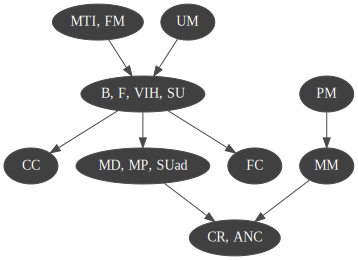

In [81]:
gnb.showBN(bnf)

In [82]:
lista=nomRed(Red5)
lista

['PM', 'FM-MTI', 'UM', 'B-F-VIH-SU', 'MM', 'MD-MP-SUad', 'FC', 'CR-ANC', 'CC']

**PART SIX  CALCULATION (NEW METHOD)**

In [83]:
Red6m=copy.deepcopy(Red5)
pp6=copy.deepcopy(pp)

Calculation of probabilities in the Bayesian network using the new method when MTI = 1 (evidence).
A routine could have been created to automatically calculate the processing path in the network, but it was preferred to leave it in a less automated way to show all the steps. Probabilities are calculated, and, if necessary, probability factors are updated when changes occur.

In [84]:
# este fue MTI=1
dir={}
ppnn=copy.deepcopy(pp)
# los que no fueron calculados
dir['PM']=round(prob(pp,'PM',1),4)
dir['UM']=round(prob(pp,'UM',1),4)
dir['MM']=round(prob(pp,'MM',1),4)
###

ppnn[1][2]=propagacion_interna(Red5,1,'MTI',1,pp)
#print(round(prob(ppnn,'FM',1),4))
#print(round(prob(ppnn,'MTI',1),4))
dir['FM']=round(prob(ppnn,'FM',1),4)
dir['MTI']=round(prob(ppnn,'MTI',1),4)
res=prob_hacia_adelante(Red5, 3, ppnn)
ppnn[3][2]=copy.deepcopy(res[2])
#print(round(prob(ppnn,'B',1),4))
#print(round(prob(ppnn,'F',1),4))
#print(round(prob(ppnn,'VIH',1),4))
#print(round(prob(ppnn,'SU',1),4))
dir['B']=round(prob(ppnn,'B',1),4)
dir['F']=round(prob(ppnn,'F',1),4)
dir['VIH']=round(prob(ppnn,'VIH',1),4)
dir['SU']=round(prob(ppnn,'SU',1),4)
res=prob_hacia_adelante(Red5, 5, ppnn)
ppnn[5][2]=copy.deepcopy(res[2])
#print(round(prob(ppnn,'MD',1),4))
#print(round(prob(ppnn,'MP',1),4))
print(round(prob(ppnn,'SUad',1),4))
dir['MD']=round(prob(ppnn,'MD',1),4)
dir['MP']=round(prob(ppnn,'MP',1),4)
res=prob_hacia_adelante(Red5, 6, ppnn)
ppnn[6][2]=copy.deepcopy(res[2])
#print(round(prob(ppnn,'FC',1),4))
dir['FC']=round(prob(ppnn,'FC',1),4)
res=prob_hacia_adelante(Red5, 8, ppnn)
ppnn[8][2]=copy.deepcopy(res[2])
#print(round(prob(ppnn,'CC',1),4))
dir['CC']=round(prob(ppnn,'FM',1),4)
res=prob_hacia_adelante(Red5, 7, ppnn)
ppnn[7][2]=copy.deepcopy(res[2])
#print(round(prob(ppnn,'CR',1),4))
#print(round(prob(ppnn,'ANC',1),4))
dir['CR']=round(prob(ppnn,'CR',1),4)
dir['ANC']=round(prob(ppnn,'ANC',1),4)


#checar que no se alteren las probabilidades de los otros
print(round(prob(pp,'UM',1),4))
print(round(prob(pp,'MM',1),4))
print(round(prob(pp,'PM',1),4))
res=prob_lateral(Red5, 3, ppnn, 'FM-MTI')
ppnn[2][2]=copy.deepcopy(res['UM'])
print(round(prob(ppnn,'UM',1),4))
res=prob_lateral(Red5, 7, ppnn, 'MD-MP-SUad')
ppnn[4][2]=copy.deepcopy(res['MM'])
print(round(prob(ppnn,'MM',1),4))
res=prob_hacia_atras(Red5, 4, pp,ppnn)   # hubo cambio , error checar
ppnn[0][2]=res['PM']
print(round(prob(ppnn,'PM',1),4))

# checar coeficientes
print(Red5[3][3][0:4])
coef=prob_lateral_coef(Red5, 3,ppnn, pp,'FM-MTI')
print(coef[0:4])
print(Red5[7][3][0:4])
coef=prob_lateral_coef(Red5, 7,ppnn, pp,'MD-MP-SUad')
print(coef[0:4])
print(Red5[4][3])
coef=prob_hacia_atras_coef(Red5, 4, ppnn, pp)
print(coef)




0.4824
0.25
0.616
0.7
0.25
0.616
0.7
[0.9373919999999999, 0.006608, 0.055608, 0.00039200000000000004]
[0.9373919999999997, 0.006607999999999999, 0.05560799999999999, 0.000392]
[0.61950684, 0.26829316000000003, 0.07829315999999999, 0.03390684]
[0.61950684, 0.26829316000000003, 0.07829315999999999, 0.03390684]
[0.9421333333333332, 0.05786666666666681, 0.14480000000000004, 0.8552]
[0.9421333333333333, 0.05786666666666681, 0.14480000000000007, 0.8552000000000001]


In [85]:
df['MIT NM']=dir
df

/tmp/ipython-input-2203055600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MIT NM']=dir


,MP,MP BN,MTI,MIT BN,CR,CR BN,MTI CR BN,MTI CR PM BN,NM,NM1,MIT NM
FM,0.4000,0.4000,0.4000,0.4000,0.4146,0.4091,0.4074,0.4142,0.400000,0.4000,0.4000
PM,0.7000,0.7000,0.7000,0.7000,0.7892,0.7684,0.7462,0.0000,0.700000,0.7000,0.7000
MTI,0.6000,0.6000,1.0000,1.0000,0.6525,0.6594,1.0000,1.0000,0.600000,0.6000,1.0000
UM,0.2500,0.2500,0.2500,0.2500,0.2634,0.2745,0.2758,0.3058,0.250000,0.2500,0.2500
F,0.4120,0.4120,0.5800,0.5800,0.4639,0.4539,0.5967,0.6120,0.412000,0.4120,0.5800
B,0.5400,0.5400,0.9000,0.9000,0.5917,0.5976,0.9062,0.9118,0.540000,0.5400,0.9000
VIH,0.3160,0.3160,0.4200,0.4200,0.3371,0.3338,0.4219,0.4237,0.316000,0.3160,0.4200
SU,0.3195,0.3194,0.4825,0.4824,0.3768,0.3917,0.5400,0.6066,0.319425,0.3194,0.4824
MM,0.6160,0.6160,0.6160,0.6160,0.7302,0.7127,0.6813,0.0757,0.616000,0.6160,0.6160
MP,0.2962,0.2962,0.4388,0.4388,0.3246,0.3227,0.4444,0.4495,0.296204,0.2962,0.4388


In [86]:
df_nuevo['MIT NM']=dir
df_nuevo[['MP NM','MIT NM']]

,MP NM,MIT NM
FM,0.4000,0.4000
PM,0.7000,0.7000
MTI,0.6000,1.0000
UM,0.2500,0.2500
F,0.4120,0.5800
B,0.5400,0.9000
VIH,0.3160,0.4200
SU,0.3194,0.4824
MM,0.6160,0.6160
MP,0.2962,0.4388


In [87]:
lista

['PM', 'FM-MTI', 'UM', 'B-F-VIH-SU', 'MM', 'MD-MP-SUad', 'FC', 'CR-ANC', 'CC']

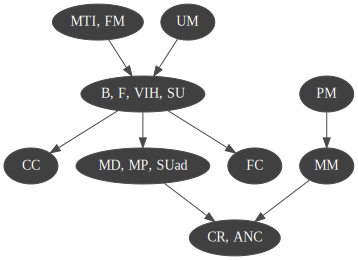

In [88]:
gnb.showBN(bnf)

Calculation of probabilities in the Bayesian network using the new method when CR = 1 (evidence). A routine could have been created to automatically calculate the processing path in the network, but it was preferred to leave it in a less automated way to show all the steps. Probabilities are calculated, and, if necessary, probability factors are updated when changes occur.

In [89]:
# este fue CR=1,
Red6=copy.deepcopy(Red6m)

dir={}
ppn=copy.deepcopy(pp6)
ppn[7][2]=propagacion_interna(Red6,7,'CR',1,pp6)
print(round(prob(ppn,'CR',1),4))
print(round(prob(ppn,'ANC',1),4))
dir['CR']=round(prob(ppn,'CR',1),4)
dir['ANC']=round(prob(ppn,'ANC',1),4)
res=prob_hacia_atras(Red6, 7, pp6,ppn)   # lo pusiste al reves
ppn[4][2]=res['MM']
print(round(prob(ppn,'MM',1),4))
dir['MM']=round(prob(ppn,'MM',1),4)
ppn[5][2]=res['MD-MP-SUad']
print(round(prob(ppn,'MD',1),4))
print(round(prob(ppn,'MP',1),4))
print(round(prob(ppn,'SUad',1),4))
dir['MD']=round(prob(ppn,'MD',1),4)
dir['MP']=round(prob(ppn,'MP',1),4)
res=prob_hacia_atras(Red6, 4, pp,ppn)
ppn[0][2]=res['PM']
print(round(prob(ppn,'PM',1),4))
dir['PM']=round(prob(ppn,'PM',1),4)
res=prob_hacia_atras(Red6, 5, pp,ppn)
ppn[3][2]=res['B-F-VIH-SU']
print(round(prob(ppn,'B',1),4))
print(round(prob(ppn,'F',1),4))
print(round(prob(ppn,'VIH',1),4))
print(round(prob(ppn,'SU',1),4))
dir['B']=round(prob(ppn,'B',1),4)
dir['F']=round(prob(ppn,'F',1),4)
dir['SU']=round(prob(ppn,'SU',1),4)
dir['VIH']=round(prob(ppn,'VIH',1),4)
res=prob_hacia_atras(Red6, 3, pp,ppn)
ppn[1][2]=res['FM-MTI']
print(round(prob(ppn,'FM',1),4))
print(round(prob(ppn,'MTI',1),4))
dir['FM']=round(prob(ppn,'FM',1),4)
dir['MTI']=round(prob(ppn,'MTI',1),4)
ppn[2][2]=res['UM']
print(round(prob(ppn,'UM',1),4))
dir['UM']=round(prob(ppn,'UM',1),4)
res=prob_hacia_adelante(Red6, 6, ppn)
ppn[6][2]=res[2]
print(round(prob(ppn,'FC',1),4))
dir['FC']=round(prob(ppn,'FC',1),4)
res=prob_hacia_adelante(Red6, 8, ppn)
ppn[8][2]=res[2]
print(round(prob(ppn,'CC',1),4))
dir['CC']=round(prob(ppn,'CC',1),4)

coef=prob_hacia_atras_coef(Red6, 7, ppn, pp6)
Red6[7][3]=copy.deepcopy(coef)
coef=prob_hacia_atras_coef(Red6, 4, ppn, pp6)
Red6[4][3]=copy.deepcopy(coef)
coef=prob_hacia_atras_coef(Red6, 5, ppn, pp6)
Red6[5][3]=copy.deepcopy(coef)
coef=prob_hacia_atras_coef(Red6, 3, ppn, pp6)
Red6[3][3]=copy.deepcopy(coef)





1.0
0.6221
0.7127
0.6969
0.3227
0.3917
0.7684
0.5976
0.4539
0.3338
0.3917
0.4091
0.6594
0.2745
0.3858
0.3171


In [90]:
# especificacion Ruta PM-MM
print(ppn[4])
print(ppn[0])
print(Red6[4])
ppn[0][2][0]*Red6[4][3][1]+ppn[0][2][1]*Red6[4][3][3]

['MM', ['MM'], [0.28733613929757795, 0.7126638607024219]]
['PM', ['PM'], [0.23157553420922306, 0.7684244657907768]]
['MM', ['MM'], ['PM'], [0.9132716527432354, 0.08672834725676475, 0.09870165749781563, 0.9012983425021843]]


0.7126638607024219

In [91]:
fact00=ppn[0][2][0]*Red6[4][3][0]
fact11=ppn[0][2][1]*Red6[4][3][3]
print(round(fact00,4))
print(round(fact11,4))

0.2115
0.6926


In [92]:
# especificacion Ruta MTI-B-MD
FMMTI01=ppn[1][2][1]
FMMTI11=ppn[1][2][3]
UM0=ppn[2][2][0]
UM1=ppn[2][2][1]


In [93]:
codigoInt(3,1,1)

['010', '011', '110', '111']

In [94]:
codigoInt(4,0,1)

['1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']

In [95]:
Red6[3][2]

['FM-MTI', 'UM']

In [96]:
Red6[3][1]

['B', 'F', 'VIH', 'SU']

In [97]:
ppn[1]

['FM-MTI',
 ['FM', 'MTI'],
 [0.20012851799186543,
  0.3907859466128557,
  0.1404222532658367,
  0.2686632821294422]]

In [98]:
df['CR NM']=dir
df

/tmp/ipython-input-3154659880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CR NM']=dir


,MP,MP BN,MTI,MIT BN,CR,CR BN,MTI CR BN,MTI CR PM BN,NM,NM1,MIT NM,CR NM
FM,0.4000,0.4000,0.4000,0.4000,0.4146,0.4091,0.4074,0.4142,0.400000,0.4000,0.4000,0.4091
PM,0.7000,0.7000,0.7000,0.7000,0.7892,0.7684,0.7462,0.0000,0.700000,0.7000,0.7000,0.7684
MTI,0.6000,0.6000,1.0000,1.0000,0.6525,0.6594,1.0000,1.0000,0.600000,0.6000,1.0000,0.6594
UM,0.2500,0.2500,0.2500,0.2500,0.2634,0.2745,0.2758,0.3058,0.250000,0.2500,0.2500,0.2745
F,0.4120,0.4120,0.5800,0.5800,0.4639,0.4539,0.5967,0.6120,0.412000,0.4120,0.5800,0.4539
B,0.5400,0.5400,0.9000,0.9000,0.5917,0.5976,0.9062,0.9118,0.540000,0.5400,0.9000,0.5976
VIH,0.3160,0.3160,0.4200,0.4200,0.3371,0.3338,0.4219,0.4237,0.316000,0.3160,0.4200,0.3338
SU,0.3195,0.3194,0.4825,0.4824,0.3768,0.3917,0.5400,0.6066,0.319425,0.3194,0.4824,0.3917
MM,0.6160,0.6160,0.6160,0.6160,0.7302,0.7127,0.6813,0.0757,0.616000,0.6160,0.6160,0.7127
MP,0.2962,0.2962,0.4388,0.4388,0.3246,0.3227,0.4444,0.4495,0.296204,0.2962,0.4388,0.3227


In [99]:
pp[7]

['CR-ANC',
 ['CR', 'ANC'],
 [0.13578827915044556,
  0.10762889913033066,
  0.2859154667367274,
  0.47066735498249634]]

In [100]:
ppn[7]

['CR-ANC', ['CR', 'ANC'], [0.0, 0.0, 0.37790372518242793, 0.622096274817572]]

In [101]:
df_nuevo['CR NM']=dir
df_nuevo[['MP NM','CR NM']]

,MP NM,CR NM
FM,0.4000,0.4091
PM,0.7000,0.7684
MTI,0.6000,0.6594
UM,0.2500,0.2745
F,0.4120,0.4539
B,0.5400,0.5976
VIH,0.3160,0.3338
SU,0.3194,0.3917
MM,0.6160,0.7127
MP,0.2962,0.3227


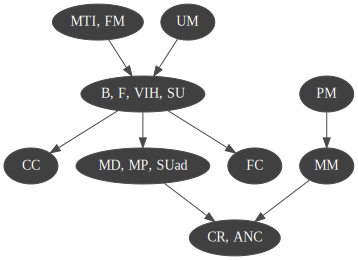

In [102]:
gnb.showBN(bnf)

In [103]:
lista

['PM', 'FM-MTI', 'UM', 'B-F-VIH-SU', 'MM', 'MD-MP-SUad', 'FC', 'CR-ANC', 'CC']

Calculation of probabilities in the Bayesian network using the new method when CR = 1 (evidence) and MTI = 1. These calculations were first performed based on the probabilities when MTI = 1 (which had already been previously calculated), and then the new evidence CR = 1 was introduced.

A routine could have been created to automatically calculate the processing path in the network, but it was preferred to leave it in a less automated way to show all the steps. Probabilities are calculated, and, if necessary, probability factors are updated when changes occur.

In [104]:
# propagacion de CR=1 seguido con MTI =1
##
print(Red6[4][3])
print(Red6[4][3][0]+Red6[4][3][1])
print(Red6[4][3][2]+Red6[4][3][3])
##
dir={}
ppnn=copy.deepcopy(ppn)
ppnn[1][2]=propagacion_interna(Red6,1,'MTI',1,ppn)
print(round(prob(ppnn,'MTI',1),4))
print(round(prob(ppnn,'FM',1),4))
dir['MTI']=round(prob(ppnn,'MTI',1),4)
dir['FM']=round(prob(ppnn,'FM',1),4)
res=prob_hacia_adelante(Red6, 3, ppnn)
ppnn[3][2]=copy.deepcopy(res[2])
print(round(prob(ppnn,'B',1),4))
print(round(prob(ppnn,'F',1),4))
print(round(prob(ppnn,'VIH',1),4))
print(round(prob(ppnn,'SU',1),4))
dir['B']=round(prob(ppnn,'B',1),4)
dir['F']=round(prob(ppnn,'F',1),4)
dir['VIH']=round(prob(ppnn,'VIH',1),4)
dir['SU']=round(prob(ppnn,'SU',1),4)
res=prob_lateral(Red6, 3, ppnn, 'FM-MTI')
ppnn[2][2]=copy.deepcopy(res['UM'])
print(round(prob(ppnn,'UM',1),4))
dir['UM']=round(prob(ppnn,'UM',1),4)
res=prob_hacia_adelante(Red6, 6, ppnn)
ppnn[6][2]=copy.deepcopy(res[2])
print(round(prob(ppnn,'FC',1),4))
dir['FC']=round(prob(ppnn,'FC',1),4)
res=prob_hacia_adelante(Red6, 8, ppnn)
ppnn[8][2]=copy.deepcopy(res[2])
print(round(prob(ppnn,'CC',1),4))
dir['CC']=round(prob(ppnn,'CC',1),4)
res=prob_hacia_adelante(Red6, 5, ppnn)
ppnn[5][2]=copy.deepcopy(res[2])
print(round(prob(ppnn,'MD',1),4))
print(round(prob(ppnn,'MP',1),4))
print(round(prob(ppnn,'SUad',1),4))
dir['MD']=round(prob(ppnn,'MD',1),4)
dir['MP']=round(prob(ppnn,'MP',1),4)
res=prob_hacia_adelante(Red6, 7, ppnn)
ppnn[7][2]=copy.deepcopy(res[2])
print(round(prob(ppnn,'CR',1),4))
print(round(prob(ppnn,'ANC',1),4))
dir['CR']=round(prob(ppnn,'CR',1),4)
dir['ANC']=round(prob(ppnn,'ANC',1),4)
res=prob_lateral(Red6, 7, ppnn, 'MD-MP-SUad')
ppnn[4][2]=copy.deepcopy(res['MM'])
print(round(prob(ppnn,'MM',1),4))
dir['MM']=round(prob(ppnn,'MM',1),4)
res=prob_hacia_atras(Red6, 4, ppn,ppnn)
ppnn[0][2]=res['PM']
print(round(prob(ppnn,'PM',1),4))
dir['PM']=round(prob(ppnn,'PM',1),4)


# actualizar valores de los coeficientes
coef=prob_lateral_coef(Red6, 3,ppnn, ppn,'FM-MTI')
Red6[3][3]=copy.deepcopy(coef)
coef=prob_lateral_coef(Red6, 7,ppnn, ppn, 'MD-MP-SUad')
Red6[7][3]=copy.deepcopy(coef)
coef=prob_hacia_atras_coef(Red6, 4, ppnn,ppn)
Red6[4][3]=copy.deepcopy(coef)




[0.9132716527432354, 0.08672834725676475, 0.09870165749781563, 0.9012983425021843]
1.0000000000000002
1.0
1.0
0.4074
0.9062
0.5967
0.4219
0.54
0.2758
0.5072
0.4008
0.7713
0.4444
0.54
1.0
0.6756
0.6813
0.7462


In [105]:
# especificacion Ruta PM-MM
print(ppnn[4])
print(ppnn[0])
print(Red6[4])
ppnn[0][2][0]*Red6[4][3][1]+ppnn[0][2][1]*Red6[4][3][3]


['MM', ['MM'], [0.3186908218136979, 0.6813091781863019]]
['PM', ['PM'], [0.2537702550243743, 0.7462297449756254]]
['MM', ['MM'], ['PM'], [0.9243389207162747, 0.07566107928372529, 0.11272814939495843, 0.8872718506050415]]


0.6813091781863018

In [106]:
fact00=ppnn[0][2][0]*Red6[4][3][0]
fact11=ppnn[0][2][1]*Red6[4][3][3]
print(round(fact00,4))
print(round(fact11,4))


0.2346
0.6621


In [107]:
df['MTI CR NM']=dir
df

/tmp/ipython-input-3540152174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MTI CR NM']=dir


,MP,MP BN,MTI,MIT BN,CR,CR BN,MTI CR BN,MTI CR PM BN,NM,NM1,MIT NM,CR NM,MTI CR NM
FM,0.4000,0.4000,0.4000,0.4000,0.4146,0.4091,0.4074,0.4142,0.400000,0.4000,0.4000,0.4091,0.4074
PM,0.7000,0.7000,0.7000,0.7000,0.7892,0.7684,0.7462,0.0000,0.700000,0.7000,0.7000,0.7684,0.7462
MTI,0.6000,0.6000,1.0000,1.0000,0.6525,0.6594,1.0000,1.0000,0.600000,0.6000,1.0000,0.6594,1.0000
UM,0.2500,0.2500,0.2500,0.2500,0.2634,0.2745,0.2758,0.3058,0.250000,0.2500,0.2500,0.2745,0.2758
F,0.4120,0.4120,0.5800,0.5800,0.4639,0.4539,0.5967,0.6120,0.412000,0.4120,0.5800,0.4539,0.5967
B,0.5400,0.5400,0.9000,0.9000,0.5917,0.5976,0.9062,0.9118,0.540000,0.5400,0.9000,0.5976,0.9062
VIH,0.3160,0.3160,0.4200,0.4200,0.3371,0.3338,0.4219,0.4237,0.316000,0.3160,0.4200,0.3338,0.4219
SU,0.3195,0.3194,0.4825,0.4824,0.3768,0.3917,0.5400,0.6066,0.319425,0.3194,0.4824,0.3917,0.5400
MM,0.6160,0.6160,0.6160,0.6160,0.7302,0.7127,0.6813,0.0757,0.616000,0.6160,0.6160,0.7127,0.6813
MP,0.2962,0.2962,0.4388,0.4388,0.3246,0.3227,0.4444,0.4495,0.296204,0.2962,0.4388,0.3227,0.4444


In [108]:
df_nuevo['MTI CR NM']=dir
df_nuevo[['CR NM','MTI CR NM']]

,CR NM,MTI CR NM
FM,0.4091,0.4074
PM,0.7684,0.7462
MTI,0.6594,1.0000
UM,0.2745,0.2758
F,0.4539,0.5967
B,0.5976,0.9062
VIH,0.3338,0.4219
SU,0.3917,0.5400
MM,0.7127,0.6813
MP,0.3227,0.4444


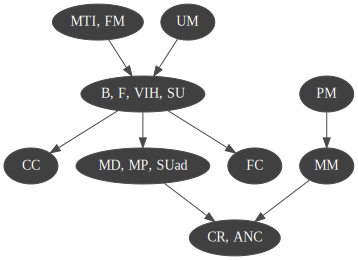

In [109]:
gnb.showBN(bnf)

In [110]:
lista

['PM', 'FM-MTI', 'UM', 'B-F-VIH-SU', 'MM', 'MD-MP-SUad', 'FC', 'CR-ANC', 'CC']

Calculation of probabilities in the Bayesian network using the new method when CR = 1 (evidence) and MTI = 1, MP=1. These calculations were first performed based on the probabilities when MTI = 1 (which had already been previously calculated), and then the new evidence CR = 1 was introduced, and then the new evidence MP=1 was introduced.

A routine could have been created to automatically calculate the processing path in the network, but it was preferred to leave it in a less automated way to show all the steps. Probabilities are calculated, and, if necessary, probability factors are updated when changes occur.

In [111]:
# Propagacion de evidencia PM al anterior
dir={}
ppn1=copy.deepcopy(ppnn)
ppnn1=copy.deepcopy(ppn1)

ppnn1[0][2]=propagacion_interna(Red6,0,'PM',1,ppn1)
print(round(prob(ppnn1,'PM',1),4))
dir['PM']=round(prob(ppnn1,'PM',1),4)
res=prob_hacia_adelante(Red6, 4, ppnn1)
ppnn1[4][2]=copy.deepcopy(res[2])
print(round(prob(ppnn1,'MM',1),4))
dir['MM']=round(prob(ppnn1,'MM',1),4)
res=prob_hacia_adelante(Red6, 7, ppnn1)
ppnn1[7][2]=copy.deepcopy(res[2])
print(round(prob(ppnn1,'CR',1),4))
dir['CR']=round(prob(ppnn1,'CR',1),4)
print(round(prob(ppnn1,'ANC',1),4))
dir['ANC']=round(prob(ppnn1,'ANC',1),4)
res=prob_lateral(Red6, 7, ppnn1, 'MM')
ppnn1[5][2]=copy.deepcopy(res['MD-MP-SUad'])
print(round(prob(ppnn1,'MD',1),4))
dir['MD']=round(prob(ppnn1,'MD',1),4)
print(round(prob(ppnn1,'MP',1),4))
dir['MP']=round(prob(ppnn1,'MP',1),4)
print(round(prob(ppnn1,'SUad',1),4))
res=prob_hacia_atras(Red6, 5, ppn1,ppnn1)
ppnn1[3][2]=res['B-F-VIH-SU']
print(round(prob(ppnn1,'B',1),4))
dir['B']=round(prob(ppnn1,'B',1),4)
print(round(prob(ppnn1,'F',1),4))
dir['F']=round(prob(ppnn1,'F',1),4)
print(round(prob(ppnn1,'VIH',1),4))
dir['VIH']=round(prob(ppnn1,'VIH',1),4)
print(round(prob(ppnn1,'SU',1),4))
dir['SU']=round(prob(ppnn1,'SU',1),4)
res=prob_hacia_atras(Red6, 3, ppn1,ppnn1)
ppnn1[1][2]=res['FM-MTI']
print(round(prob(ppnn1,'FM',1),4))
dir['FM']=round(prob(ppnn1,'FM',1),4)
print(round(prob(ppnn1,'MTI',1),4))
dir['MTI']=round(prob(ppnn1,'MTI',1),4)
ppnn1[2][2]=res['UM']
print(round(prob(ppnn1,'UM',1),4))
dir['UM']=round(prob(ppnn1,'UM',1),4)
res=prob_hacia_adelante(Red6, 6, ppnn1)
ppnn1[6][2]=copy.deepcopy(res[2])
print(round(prob(ppnn1,'FC',1),4))
dir['FC']=round(prob(ppnn1,'FC',1),4)
res=prob_hacia_adelante(Red6, 8, ppnn1)
ppnn1[8][2]=copy.deepcopy(res[2])
print(round(prob(ppnn1,'CC',1),4))
dir['CC']=round(prob(ppnn1,'CC',1),4)





1
0.8873
1.0
0.7163
0.7515
0.4427
0.5173
0.9043
0.5915
0.4213
0.5173
0.4051
1.0
0.2657
0.5028
0.4003


In [112]:
# especificacion Ruta PM-MM
print(ppnn1[4])
print(ppnn1[0])
print(Red6[4])
ppnn1[0][2][0]*Red6[4][3][1]+ppnn1[0][2][1]*Red6[4][3][3]


['MM', ['MM'], [0.11272814939495843, 0.8872718506050415]]
['PM', ['PM'], [0, 1]]
['MM', ['MM'], ['PM'], [0.9243389207162747, 0.07566107928372529, 0.11272814939495843, 0.8872718506050415]]


0.8872718506050415

In [113]:
fact00=ppnn1[0][2][0]*Red6[4][3][0]
fact11=ppnn1[0][2][1]*Red6[4][3][3]
print(round(fact00,4))
print(round(fact11,4))



0.0
0.8873


In [114]:
df['MTI CR PM NM']=dir
df

/tmp/ipython-input-3265975066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MTI CR PM NM']=dir


,MP,MP BN,MTI,MIT BN,CR,CR BN,MTI CR BN,MTI CR PM BN,NM,NM1,MIT NM,CR NM,MTI CR NM,MTI CR PM NM
FM,0.4000,0.4000,0.4000,0.4000,0.4146,0.4091,0.4074,0.4142,0.400000,0.4000,0.4000,0.4091,0.4074,0.4051
PM,0.7000,0.7000,0.7000,0.7000,0.7892,0.7684,0.7462,0.0000,0.700000,0.7000,0.7000,0.7684,0.7462,1.0000
MTI,0.6000,0.6000,1.0000,1.0000,0.6525,0.6594,1.0000,1.0000,0.600000,0.6000,1.0000,0.6594,1.0000,1.0000
UM,0.2500,0.2500,0.2500,0.2500,0.2634,0.2745,0.2758,0.3058,0.250000,0.2500,0.2500,0.2745,0.2758,0.2657
F,0.4120,0.4120,0.5800,0.5800,0.4639,0.4539,0.5967,0.6120,0.412000,0.4120,0.5800,0.4539,0.5967,0.5915
B,0.5400,0.5400,0.9000,0.9000,0.5917,0.5976,0.9062,0.9118,0.540000,0.5400,0.9000,0.5976,0.9062,0.9043
VIH,0.3160,0.3160,0.4200,0.4200,0.3371,0.3338,0.4219,0.4237,0.316000,0.3160,0.4200,0.3338,0.4219,0.4213
SU,0.3195,0.3194,0.4825,0.4824,0.3768,0.3917,0.5400,0.6066,0.319425,0.3194,0.4824,0.3917,0.5400,0.5173
MM,0.6160,0.6160,0.6160,0.6160,0.7302,0.7127,0.6813,0.0757,0.616000,0.6160,0.6160,0.7127,0.6813,0.8873
MP,0.2962,0.2962,0.4388,0.4388,0.3246,0.3227,0.4444,0.4495,0.296204,0.2962,0.4388,0.3227,0.4444,0.4427


In [115]:
df_nuevo['MTI CR PM NM']=dir
df_nuevo[['MTI CR NM','MTI CR PM NM']]

,MTI CR NM,MTI CR PM NM
FM,0.4074,0.4051
PM,0.7462,1.0000
MTI,1.0000,1.0000
UM,0.2758,0.2657
F,0.5967,0.5915
B,0.9062,0.9043
VIH,0.4219,0.4213
SU,0.5400,0.5173
MM,0.6813,0.8873
MP,0.4444,0.4427


**PART SEVEN COMPARISON BETWEEN THE TWO METHODS**

The table is composed of several columns with different acronyms. These acronyms consist of two parts: the first part indicates the variables that were entered as evidence, and the last part indicates the type of method used. BN refers to the standard method employed by the PyAgrum library, and NM refers to the new method developed. It can be seen that the results are identical.

In [116]:
df_nuevo

,MP BN,MIT BN,CR BN,MTI CR BN,MTI CR PM BN,MP NM,MIT NM,CR NM,MTI CR NM,MTI CR PM NM
FM,0.4000,0.4000,0.4091,0.4074,0.4142,0.4000,0.4000,0.4091,0.4074,0.4051
PM,0.7000,0.7000,0.7684,0.7462,0.0000,0.7000,0.7000,0.7684,0.7462,1.0000
MTI,0.6000,1.0000,0.6594,1.0000,1.0000,0.6000,1.0000,0.6594,1.0000,1.0000
UM,0.2500,0.2500,0.2745,0.2758,0.3058,0.2500,0.2500,0.2745,0.2758,0.2657
F,0.4120,0.5800,0.4539,0.5967,0.6120,0.4120,0.5800,0.4539,0.5967,0.5915
B,0.5400,0.9000,0.5976,0.9062,0.9118,0.5400,0.9000,0.5976,0.9062,0.9043
VIH,0.3160,0.4200,0.3338,0.4219,0.4237,0.3160,0.4200,0.3338,0.4219,0.4213
SU,0.3194,0.4824,0.3917,0.5400,0.6066,0.3194,0.4824,0.3917,0.5400,0.5173
MM,0.6160,0.6160,0.7127,0.6813,0.0757,0.6160,0.6160,0.7127,0.6813,0.8873
MP,0.2962,0.4388,0.3227,0.4444,0.4495,0.2962,0.4388,0.3227,0.4444,0.4427


In [117]:
list=["MP BN", "MIT BN",	"CR BN",	"MTI CR BN",	"MTI CR PM BN"]
latex_code = df_nuevo[list].to_latex(index=True, float_format="%.4f")
print(latex_code)

\begin{tabular}{lrrrrr}
\toprule
 & MP BN & MIT BN & CR BN & MTI CR BN & MTI CR PM BN \\
\midrule
FM & 0.4000 & 0.4000 & 0.4091 & 0.4074 & 0.4142 \\
PM & 0.7000 & 0.7000 & 0.7684 & 0.7462 & 0.0000 \\
MTI & 0.6000 & 1.0000 & 0.6594 & 1.0000 & 1.0000 \\
UM & 0.2500 & 0.2500 & 0.2745 & 0.2758 & 0.3058 \\
F & 0.4120 & 0.5800 & 0.4539 & 0.5967 & 0.6120 \\
B & 0.5400 & 0.9000 & 0.5976 & 0.9062 & 0.9118 \\
VIH & 0.3160 & 0.4200 & 0.3338 & 0.4219 & 0.4237 \\
SU & 0.3194 & 0.4824 & 0.3917 & 0.5400 & 0.6066 \\
MM & 0.6160 & 0.6160 & 0.7127 & 0.6813 & 0.0757 \\
MP & 0.2962 & 0.4388 & 0.3227 & 0.4444 & 0.4495 \\
MD & 0.5899 & 0.7077 & 0.6969 & 0.7713 & 0.8294 \\
FC & 0.3502 & 0.4930 & 0.3858 & 0.5072 & 0.5202 \\
ANC & 0.5783 & 0.6468 & 0.6221 & 0.6756 & 0.5559 \\
CR & 0.7566 & 0.8315 & 1.0000 & 1.0000 & 1.0000 \\
CC & 0.3002 & 0.3990 & 0.3171 & 0.4008 & 0.4025 \\
\bottomrule
\end{tabular}



In [118]:
list=["MP NM", "MIT NM",	"CR NM",	"MTI CR NM",	"MTI CR PM NM"]
latex_code = df_nuevo[list].to_latex(index=True, float_format="%.4f")
print(latex_code)

\begin{tabular}{lrrrrr}
\toprule
 & MP NM & MIT NM & CR NM & MTI CR NM & MTI CR PM NM \\
\midrule
FM & 0.4000 & 0.4000 & 0.4091 & 0.4074 & 0.4051 \\
PM & 0.7000 & 0.7000 & 0.7684 & 0.7462 & 1.0000 \\
MTI & 0.6000 & 1.0000 & 0.6594 & 1.0000 & 1.0000 \\
UM & 0.2500 & 0.2500 & 0.2745 & 0.2758 & 0.2657 \\
F & 0.4120 & 0.5800 & 0.4539 & 0.5967 & 0.5915 \\
B & 0.5400 & 0.9000 & 0.5976 & 0.9062 & 0.9043 \\
VIH & 0.3160 & 0.4200 & 0.3338 & 0.4219 & 0.4213 \\
SU & 0.3194 & 0.4824 & 0.3917 & 0.5400 & 0.5173 \\
MM & 0.6160 & 0.6160 & 0.7127 & 0.6813 & 0.8873 \\
MP & 0.2962 & 0.4388 & 0.3227 & 0.4444 & 0.4427 \\
MD & 0.5899 & 0.7077 & 0.6969 & 0.7713 & 0.7515 \\
FC & 0.3502 & 0.4930 & 0.3858 & 0.5072 & 0.5028 \\
ANC & 0.5783 & 0.6468 & 0.6221 & 0.6756 & 0.7163 \\
CR & 0.7566 & 0.8315 & 1.0000 & 1.0000 & 1.0000 \\
CC & 0.3002 & 0.4000 & 0.3171 & 0.4008 & 0.4003 \\
\bottomrule
\end{tabular}



In [119]:
# Exportar a LaTeX
latex_code = df_nuevo.to_latex(index=True, float_format="%.4f")
print(latex_code)

\begin{tabular}{lrrrrrrrrrr}
\toprule
 & MP BN & MIT BN & CR BN & MTI CR BN & MTI CR PM BN & MP NM & MIT NM & CR NM & MTI CR NM & MTI CR PM NM \\
\midrule
FM & 0.4000 & 0.4000 & 0.4091 & 0.4074 & 0.4142 & 0.4000 & 0.4000 & 0.4091 & 0.4074 & 0.4051 \\
PM & 0.7000 & 0.7000 & 0.7684 & 0.7462 & 0.0000 & 0.7000 & 0.7000 & 0.7684 & 0.7462 & 1.0000 \\
MTI & 0.6000 & 1.0000 & 0.6594 & 1.0000 & 1.0000 & 0.6000 & 1.0000 & 0.6594 & 1.0000 & 1.0000 \\
UM & 0.2500 & 0.2500 & 0.2745 & 0.2758 & 0.3058 & 0.2500 & 0.2500 & 0.2745 & 0.2758 & 0.2657 \\
F & 0.4120 & 0.5800 & 0.4539 & 0.5967 & 0.6120 & 0.4120 & 0.5800 & 0.4539 & 0.5967 & 0.5915 \\
B & 0.5400 & 0.9000 & 0.5976 & 0.9062 & 0.9118 & 0.5400 & 0.9000 & 0.5976 & 0.9062 & 0.9043 \\
VIH & 0.3160 & 0.4200 & 0.3338 & 0.4219 & 0.4237 & 0.3160 & 0.4200 & 0.3338 & 0.4219 & 0.4213 \\
SU & 0.3194 & 0.4824 & 0.3917 & 0.5400 & 0.6066 & 0.3194 & 0.4824 & 0.3917 & 0.5400 & 0.5173 \\
MM & 0.6160 & 0.6160 & 0.7127 & 0.6813 & 0.0757 & 0.6160 & 0.6160 & 0.7127 & 

**PART8**
Subroutine main

In [120]:
# Delete the variable named 'list' to restore the built-in function
if 'list' in globals():
    del list

In [121]:
nodos=[]
nodos1=[]
for r in Red5:
  nodos.append(r[0])
  for r1 in r[1]:
    nodos1.append(r1)
#evid={'CR':1,'MTI':1,'MP':1}
evid={'CR':1}

In [122]:
pp=[]
pp=probabilidad_marginal(Red5)
dir={}
for p in pp:
  for pf in p[1]:
    nom=pf
    dir[nom]=round(prob(pp,nom,1),4)


In [123]:
# determinar la propagacion de evidencia
def propagacion_evidencia(Redc,pp,evid,evido):
# Redc es la red bayesiana, pp son las probabilidades de los nodos, evid son las nuevas variables, evid0o es el conjunto de las anteriores evidencias
  evidr = list(evido.keys())
  evidc=list(evid.keys())
  ppn = copy.deepcopy(pp)
  Redcn = copy.deepcopy(Redc)
  for r in evidc:
    evidr.append(r)
    Redcc,ppc=propagacion_simple(Redcn,ppn,r,evid[r],evidr)
    Redcn=copy.deepcopy(Redcc)
    ppn=copy.deepcopy(ppc)

  # pegar evidencia
  evidn = evido | evid
  return Redcn,ppn,evidn

In [124]:
dict1 = {'a': 1, 'b': 2}
dict2 = {'c': 3, 'd': 4}

dict3 = dict1 | dict2
print(dict3)

{'a': 1, 'b': 2, 'c': 3, 'd': 4}


In [125]:
list(dict3.keys())

['a', 'b', 'c', 'd']

In [126]:
pp

[['PM', ['PM'], [0.3, 0.7]],
 ['FM-MTI', ['FM', 'MTI'], [0.24, 0.36, 0.16000000000000003, 0.24]],
 ['UM', ['UM'], [0.75, 0.25]],
 ['B-F-VIH-SU',
  ['B', 'F', 'VIH', 'SU'],
  [0.27876600335999996,
   0.029758796639999998,
   0.045102086640000004,
   0.0075731133600000005,
   0.05007080664000001,
   0.012204393360000003,
   0.027145603360000006,
   0.00937919664,
   0.07593197904,
   0.07077522096,
   0.041454030960000006,
   0.03863876904,
   0.08617251096000002,
   0.08032028904,
   0.07593197904,
   0.07077522096]],
 ['MM', ['MM'], [0.38399999999999995, 0.616]],
 ['MD-MP-SUad',
  ['MD', 'MP', 'SUad'],
  [0.258831012740925,
   0.06913314778365097,
   0.04908010141907498,
   0.03306453805634902,
   0.255021894786643,
   0.12081016292878102,
   0.11764199105335704,
   0.09641715123121898]],
 ['FC', ['FC'], [0.6497999999999999, 0.3502]],
 ['CR-ANC',
  ['CR', 'ANC'],
  [0.13578827915044556,
   0.10762889913033066,
   0.2859154667367274,
   0.47066735498249634]],
 ['CC', ['CC'], [0.6998, 0.